In [1]:
%matplotlib inline
import numpy as np
import sklearn as sk
import pandas as pd

In [2]:
# train_id_df = pd.read_csv('ieee-fraud-detection/train_identity.csv', low_memory=False)
train_transaction_df = pd.read_csv('ieee-fraud-detection/train_transaction.csv', low_memory=False)

In [3]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
train_transaction_df.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,238269.000000,37627.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,589271.000000,309743.000000,327662.000000,421618.000000,280699.000000,73187.000000,38917.000000,74926.000000,74926.000000,514518.000000,311253.000000,64717.000000,61952.000000,62187.000000,501427.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,421571.000000,421571.000000,421571.000000,421571.00000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,590226.000000,590226.00000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.00

# mapping to numbers

#### use groupby
a=df_prep.groupby('M6')
a.size()

In [4]:
df_prep = train_transaction_df.copy()
df_prep['ProductCD'    ] = df_prep['ProductCD'    ].map({'S':1, 'H':2, 'R':3, 'C':4, 'W':5, np.nan: 0})
df_prep['card6'        ] = df_prep['card6'        ].map({'charge card':1, 'debit or credit':2, 'credit':3, 'debit':4, np.nan:0})
df_prep['card4'        ] = df_prep['card4'        ].map({'discover':1, 'american express':2, 'mastercard':3, 'visa':4, np.nan:0})
#P email domain
email_group = df_prep.groupby('P_emaildomain')
iter_index = iter(list(range(1, len(email_group.groups.keys())+1)))
domain_dic={ i:iter_index.__next__() for i in email_group.groups.keys()}
df_prep['P_emaildomain'] = df_prep['P_emaildomain'].map(domain_dic)
df_prep['P_emaildomain'].fillna(0, inplace=True)
#R email domain
df_prep.drop(columns=['R_emaildomain'], inplace=True)

#M1~M9
df_prep['M1'] = df_prep['M1'].map({'T':2, 'F':1, np.nan:0})
df_prep['M2'] = df_prep['M2'].map({'T':2, 'F':1, np.nan:0})
df_prep['M3'] = df_prep['M3'].map({'T':2, 'F':1, np.nan:0})
df_prep['M4'] = df_prep['M4'].map({'T':2, 'F':1, np.nan:0})
df_prep['M5'] = df_prep['M5'].map({'T':2, 'F':1, np.nan:0})
df_prep['M6'] = df_prep['M6'].map({'T':2, 'F':1, np.nan:0})
df_prep['M7'] = df_prep['M7'].map({'T':2, 'F':1, np.nan:0})
df_prep['M8'] = df_prep['M8'].map({'T':2, 'F':1, np.nan:0})
df_prep['M9'] = df_prep['M9'].map({'T':2, 'F':1, np.nan:0})

# drop missing values > 20%, and fillna 0 with remaining
drop index:     (590540, 182)
drop columns:   (56247, 394)
original shape: (590540, 394)

In [5]:
threshold = 0.8
df_prep.dropna(axis = 'columns', thresh = df_prep.shape[0]*threshold, inplace=True)
df_prep.dropna(axis = 'index'  , thresh = df_prep.shape[1]*threshold, inplace=True)
df_prep.fillna(df_prep.mean(), inplace=True)


# draw corr matrix

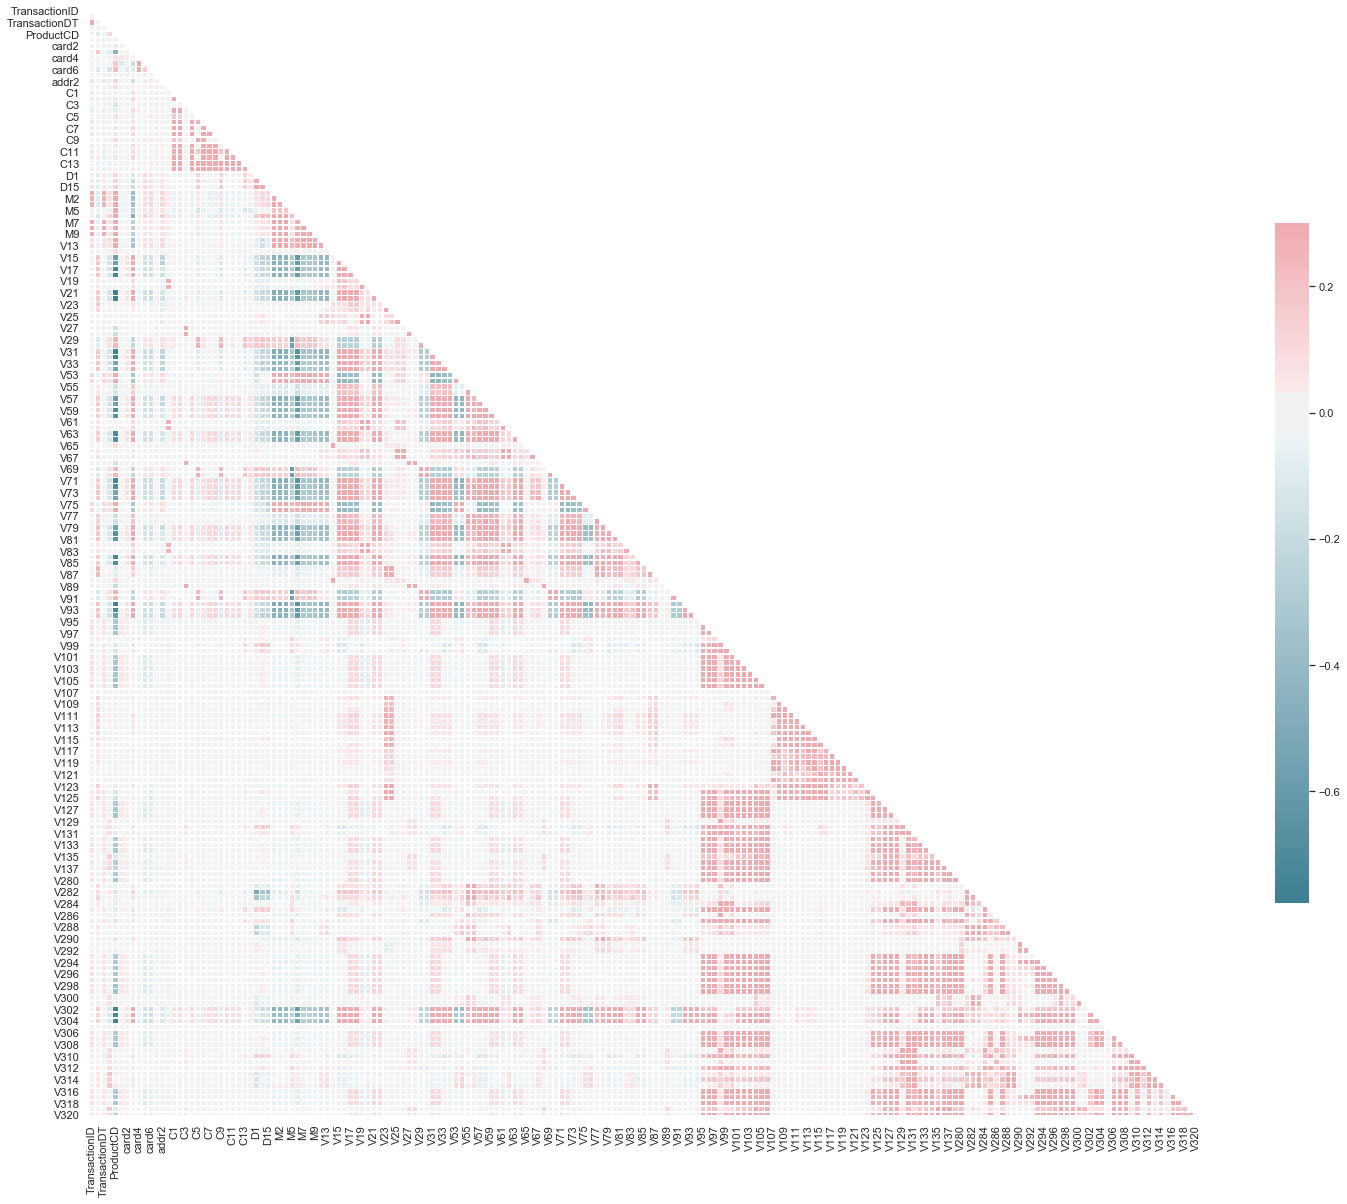

In [6]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Compute the correlation matrix
corr = df_prep.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 25))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5,  cbar_kws={"shrink": .5})

In [7]:
corr

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D10,D15,M1,M2,M3,M5,M6,M7,M8,M9,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
TransactionID,1.000000,0.005301,0.998277,0.005746,0.022584,0.009664,-0.008209,-0.037501,-0.017356,-0.022510,0.008289,0.001864,0.073425,0.008440,-0.065586,-0.067310,0.000489,-0.068415,0.009340,-0.065778,-0.068376,-0.067923,0.015030,-0.070051,-0.067250,-0.067734,-0.036734,-0.060337,0.039415,0.055899,0.069322,0.290873,0.278822,0.273805,0.009759,0.033596,0.318296,0.308690,0.332332,0.093206,0.091340,-0.003023,-0.028111,-0.031148,-0.013869,-0.016324,0.013838,0.005270,-0.014065,-0.013460,-0.002116,-0.002047,0.009376,0.002717,-0.006722,-0.004429,0.011868,0.013558,-0.026779,-0.029831,-0.012514,0.000413,0.110675,0.107610,0.004512,0.021173,-0.040047,-0.031942,-0.022615,-0.015864,0.017901,0.016410,-0.022968,-0.012828,-0.003991,0.010862,0.011166,-0.002500,0.015207,0.016741,-0.034786,-0.027426,-0.023112,-0.007852,0.097004,0.094177,-0.002379,0.016962,-0.029157,-0.038305,-0.029105,0.009756,0.008578,-0.040763,-0.025020,-0.000237,0.003423,-0.003965,-0.002456,0.020272,0.020936,-0.049377,-0.039663,-0.025059,0.062288,0.067902,0.069820,0.012156,0.060890,0.052540,0.061373,0.064678,0.068080,0.070328,0.073730,0.075431,-0.022682,0.001706,0.025407,0.012096,-0.009046,0.004114,-0.004839,0.010593,0.044697,0.023931,-0.013002,0.005315,-0.007064,-0.008271,0.018228,0.003411,0.010960,0.052854,0.038730,0.061933,0.067361,0.068966,0.002686,0.052750,0.033666,0.061001,0.063632,0.066993,0.023508,0.063139,0.050435,0.062327,0.068383,-0.005338,-0.011079,-0.011416,0.009899,0.045628,-0.006447,0.042932,0.022331,0.016885,0.004046,-0.002983,-0.001487,0.061452,0.057051,0.066685,0.070613,0.069308,0.072081,0.074759,0.007716,0.012195,-0.013017,0.013784,0.002705,-0.002348,0.061962,0.062515,0.067573,0.004424,0.042366,-0.000575,0.029218,0.020931,0.029737,0.018378,0.060853,0.058744,0.065535,0.023927,0.060862,0.049565
isFraud,0.005301,1.000000,0.004757,0.004932,-0.103972,-0.010678,0.001091,0.173377,-0.007204,-0.034860,-0.100393,0.002352,-0.025061,-0.012392,0.029276,0.036653,-0.003522,0.028988,-0.031162,0.018522,0.029526,0.031413,-0.031538,0.027645,0.025608,0.033299,-0.013370,0.004092,-0.067800,-0.071474,-0.076022,-0.092106,-0.094926,-0.094687,0.003524,-0.122240,-0.062621,-0.066807,-0.071368,-0.051556,-0.044850,0.003125,0.177952,0.174250,0.183062,0.183059,0.032102,0.041455,0.166339,0.159104,0.149094,0.123541,0.005959,0.017719,-0.004601,-0.004503,-0.107102,-0.102355,0.163832,0.160729,0.183478,0.180249,-0.045310,-0.035087,0.048870,0.059762,0.165684,0.169642,0.148571,0.148270,0.050311,0.072677,0.150730,0.147642,0.003069,0.041923,0.079217,-0.003833,-0.101656,-0.098124,0.154266,0.158137,0.170637,0.182174,-0.051032,-0.045331,0.155897,0.147719,0.190816,0.177948,0.179516,0.050338,0.068100,0.166766,0.166288,0.247323,0.247158,0.000163,-0.004796,-0.108355,-0.103704,0.178134,0.178456,0.185164,-0.004379,-0.005612,-0.004634,0.031716,-0.014690,0.012760,-0.004878,-0.004863,-0.005213,-0.000781,-0.003707,-0.003469,0.002539,0.104600,0.065922,0.088121,0.130936,0.112859,0.124569,0.103771,0.061610,0.086859,0.049460,0.039895,0.048035,0.018660,0.011812,0.017839,0.149639,0.080309,0.118645,-0.003604,-0.002186,-0.001624,0.015114,0.005992

# PCA reduce dimension

In [8]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# split to input set and label
Y_train = df_prep['isFraud']
X_train = df_prep.drop(columns=['isFraud', 'TransactionID'])

# scale -> mean=0, s.e.=1
X_scaled = scale(X_train)

# project to 2 dimension
pca = PCA(n_components = 2)
X_reduced = pca.fit_transform(X_scaled) 

# split to train/test sets
X_train_split, X_test_split, Y_train_split, Y_test_split = train_test_split(X_reduced, Y_train, test_size=0.8, random_state=500)

# training split & test split plot
red: is fraud
blue: not fraud

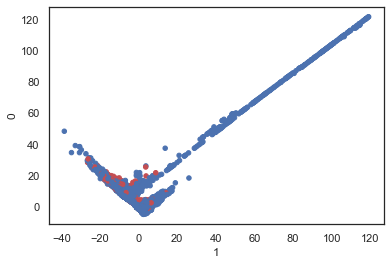

In [9]:
df_reduced_split = pd.DataFrame(X_train_split)
color=Y_train_split.map({1:'r', 0:'b'})
df_reduced_split.plot.scatter(x=1, y=0, c=color)

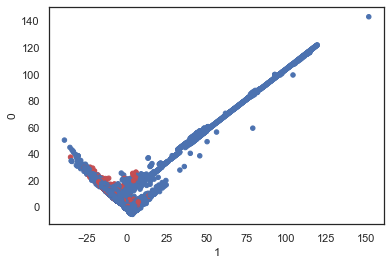

In [10]:
df_reduced_test_split = pd.DataFrame(X_test_split)
color=Y_test_split.map({1:'r', 0:'b'})
df_reduced_test_split.plot.scatter(x=1, y=0, c=color)

# logistic regression + cal acc

In [11]:
from sklearn.linear_model  import LogisticRegression
lr=LogisticRegression(solver='saga')
lr.fit(X_train_split, Y_train_split)
print(lr.coef_)

predictions = lr.predict(X_test_split)

# calculate false-neg-rate and acc
pred_fraud = np.where(predictions == 1)[0]
real_fraud = np.where(Y_test_split==1)[0]
false_pos = len(np.setdiff1d(pred_fraud, real_fraud))

pred_good = np.where(predictions == 0) [0]
real_good = np.where(Y_test_split == 0) [0]
false_neg = len(np.setdiff1d(pred_good, real_good))

false_neg_rate = false_neg / (false_pos + false_neg)
accuracy = (len(X_test_split) - (false_neg+false_pos))/len(X_test_split)

print(false_pos, false_neg)
print('{:-<20}: {:7f}'.format('false neg rate', false_neg_rate))
print('{:-<20}: {:7f}'.format('acc', accuracy))
print('{:-<20}: {}'.format('total data points', len(X_test_split)))
print('{:-<20}: {}'.format('misprediction', false_neg+false_pos))

[[ 0.08105069 -0.07837304]]
114 13505
false neg rate------: 0.991629
acc-----------------: 0.966988
total data points---: 412545
misprediction-------: 13619


# generate submit csv

In [12]:
# test_id_df = pd.read_csv('ieee-fraud-detection/test_identity.csv', low_memory=False)
test_transaction_df = pd.read_csv('ieee-fraud-detection/test_transaction.csv', low_memory=False)

In [13]:
# submit preprocessing
df_prep_test = test_transaction_df.copy()
df_prep_test['ProductCD'    ] = df_prep_test['ProductCD'    ].map({'S':1, 'H':2, 'R':3, 'C':4, 'W':5, np.nan: 0})
df_prep_test['card6'        ] = df_prep_test['card6'        ].map({'charge card':1, 'debit or credit':2, 'credit':3, 'debit':4, np.nan:0})
df_prep_test['card4'        ] = df_prep_test['card4'        ].map({'discover':1, 'american express':2, 'mastercard':3, 'visa':4, np.nan:0})
# P email domain
# use same domain_dic
df_prep_test['P_emaildomain'] = df_prep_test['P_emaildomain'].map(domain_dic)
df_prep_test['P_emaildomain'].fillna(0, inplace=True)

#M1~M9
df_prep_test['M1'] = df_prep_test['M1'].map({'T':2, 'F':1, np.nan:0})
df_prep_test['M2'] = df_prep_test['M2'].map({'T':2, 'F':1, np.nan:0})
df_prep_test['M3'] = df_prep_test['M3'].map({'T':2, 'F':1, np.nan:0})
df_prep_test['M4'] = df_prep_test['M4'].map({'T':2, 'F':1, np.nan:0})
df_prep_test['M5'] = df_prep_test['M5'].map({'T':2, 'F':1, np.nan:0})
df_prep_test['M6'] = df_prep_test['M6'].map({'T':2, 'F':1, np.nan:0})
df_prep_test['M7'] = df_prep_test['M7'].map({'T':2, 'F':1, np.nan:0})
df_prep_test['M8'] = df_prep_test['M8'].map({'T':2, 'F':1, np.nan:0})
df_prep_test['M9'] = df_prep_test['M9'].map({'T':2, 'F':1, np.nan:0})


In [14]:
#drop same columns as training
droplist = []
for v in train_transaction_df.columns:
    if v not in df_prep.columns:
        droplist.append(v)
print(train_transaction_df.columns.shape, df_prep.columns.shape, len(droplist))
print(droplist)

df_prep_test.drop(columns=droplist, inplace=True)

# fillna with training data's mean
df_prep_test.fillna(df_prep.mean(), inplace=True)

(394,) (190,) 204
['dist1', 'dist2', 'R_emaildomain', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D11', 'D12', 'D13', 'D14', 'M4', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216', 'V217', 'V218', 'V219', 'V220', 'V221'

In [15]:
#PCA reduce dimension
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

X_submit = df_prep_test.drop(columns=['TransactionID'])

# scale -> mean=0, s.e.=1
X_scaled_submit = scale(X_submit)

# project to same dimension
X_reduced_submit = pca.fit_transform(X_scaled_submit)

In [16]:
#predict probability to csv
predictions = lr.predict_proba(X_reduced_submit)
predictions[:,1]
z = pd.DataFrame()
z['TransactionID'] = df_prep_test['TransactionID']
z['isFraud']= predictions[:,1]
z.set_index('TransactionID', inplace=True)
z.to_csv('submit.csv')
